<a href="https://colab.research.google.com/github/codingcat101/TextToImageAndVideoGeneration/blob/main/texttoimagevideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Persist Ventures intern task*


#Text to Image Generation


In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.0 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

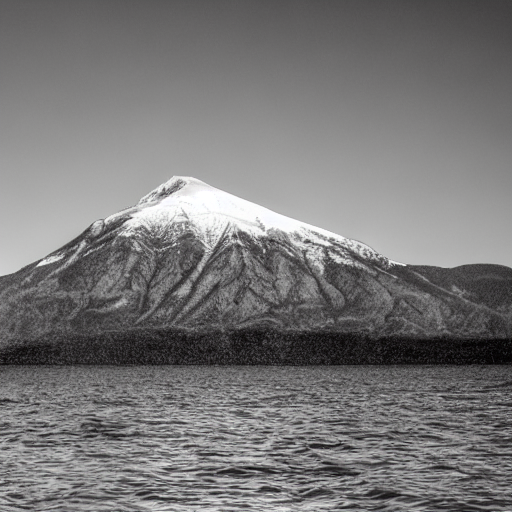

In [11]:
# prompt = "a photograph of an astronaut riding a horse"
prompt = " mountain in a sea"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image





## Text-to-Video Generation


In [ ]:
pip install diffusers transformers accelerate torch


In [ ]:
pip install diffusers

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML
from base64 import b64encode
import datetime

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()


!mkdir /content/videos

model_index.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/644 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/787 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/755 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/657 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.82G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
import numpy as np
import cv2
import datetime

# Load the pipeline
pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()

# Generate video frames
prompt = "Athlete running race"
output = pipe(prompt, num_inference_steps=25, num_frames=24)
video_frames = output.frames

# Debugging print
print("Input frames shape:", video_frames.shape)
print("Input frames dtype:", video_frames.dtype)

# Manual conversion method
def process_frames(frames):
    # Remove the first dimension
    frames = frames[0]  # This reduces from (1, 24, 256, 256, 3) to (24, 256, 256, 3)

    # Normalize to 0-255 range
    frames = ((frames - frames.min()) / (frames.max() - frames.min()) * 255).astype(np.uint8)

    return frames

# Process frames
processed_frames = process_frames(video_frames)

# Save debug frames
import os
os.makedirs('/content/debug_frames', exist_ok=True)
for i, frame in enumerate(processed_frames):
    cv2.imwrite(f'/content/debug_frames/frame_{i}.png', frame)

# Create video using OpenCV
output_video_path = '/content/output_video.mp4'
height, width, layers = processed_frames[0].shape
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_video_path, fourcc, 8, (width, height))

for frame in processed_frames:
    video.write(frame)
video.release()

# Generate a timestamped filename
new_video_path = f'/content/videos/{datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.mp4'

# Use FFmpeg to process the video
!ffmpeg -y -i {output_video_path} -c:v libx264 -c:a aac -strict -2 {new_video_path} >/dev/null 2>&1

print(f"Number of frames: {len(processed_frames)}")
print(f"Frame shape: {processed_frames[0].shape}")
print(f"Frame dtype: {processed_frames[0].dtype}")
print(output_video_path, '->', new_video_path)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Input frames shape: (1, 24, 256, 256, 3)
Input frames dtype: float32
Number of frames: 24
Frame shape: (256, 256, 3)
Frame dtype: uint8
/content/output_video.mp4 -> /content/videos/2024-12-12_14:16:46.mp4


In [ ]:
!cp {new_video_path} /content/videos/tmp.mp4
mp4 = open('/content/videos/tmp.mp4','rb').read()

decoded_vid = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=400 controls><source src="{decoded_vid}" type="video/mp4"></video>')